# **Data preprocessing**

In [1]:
import pandas as pd

# Load the CSV file to check the structure and content
file_path = 'all_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,Date,crude_oil_Price,crude_oil_Open,crude_oil_High,crude_oil_Low,crude_oil_Vol.,crude_oil_Change %,gold_Open,gold_High,gold_Low,...,silver_Change %,dollar_rate_Price,dollar_rate_Open,dollar_rate_High,dollar_rate_Low,dollar_rate_Change %,cpi_CPI,ppi_PPI,m1sl_M1SL,is_holiday
0,2014-01-01,98.70,98.61,98.76,98.54,NaN,0.28,NaN,NaN,NaN,...,NaN,80.03,80.21,80.24,80.10,0.00,234.1,201.2,2638.8,1
1,2014-01-02,95.44,98.50,98.97,95.34,251250.0,-3.30,117.930000,118.730003,117.750000,...,3.91,80.63,80.12,80.71,80.08,0.75,234.1,201.2,2638.8,0
2,2014-01-03,93.96,95.47,95.74,93.86,215520.0,-1.55,118.639999,119.620003,118.589996,...,0.41,80.79,80.57,80.89,80.49,0.20,234.1,201.2,2638.8,0
3,2014-01-06,93.43,94.18,94.59,93.20,189380.0,-0.56,119.760002,120.389999,117.110001,...,-0.53,80.65,80.86,80.91,80.54,-0.17,234.1,201.2,2638.8,0
4,2014-01-07,93.67,93.60,94.22,93.35,177180.0,0.26,118.459999,118.919998,118.129997,...,-1.57,80.83,80.69,80.95,80.60,0.22,234.1,201.2,2638.8,0


In [2]:
data = data.sort_values(by='Date')

# Drop rows with missing values, as they might interfere with LSTM training
data = data.dropna().reset_index(drop=True)

# Check the data to confirm preprocessing
data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2867 entries, 0 to 2866
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2867 non-null   object 
 1   crude_oil_Price       2867 non-null   float64
 2   crude_oil_Open        2867 non-null   float64
 3   crude_oil_High        2867 non-null   float64
 4   crude_oil_Low         2867 non-null   float64
 5   crude_oil_Vol.        2867 non-null   float64
 6   crude_oil_Change %    2867 non-null   float64
 7   gold_Open             2867 non-null   float64
 8   gold_High             2867 non-null   float64
 9   gold_Low              2867 non-null   float64
 10  gold_Close            2867 non-null   float64
 11  gold_Adj Close        2867 non-null   float64
 12  gold_Volume           2867 non-null   float64
 13  sp500_Price           2867 non-null   float64
 14  sp500_Open            2867 non-null   float64
 15  sp500_High           

(None,
          Date  crude_oil_Price  crude_oil_Open  crude_oil_High  crude_oil_Low  \
 0  2014-01-02            95.44           98.50           98.97          95.34   
 1  2014-01-03            93.96           95.47           95.74          93.86   
 2  2014-01-06            93.43           94.18           94.59          93.20   
 3  2014-01-07            93.67           93.60           94.22          93.35   
 4  2014-01-08            92.33           93.96           94.18          92.26   
 
    crude_oil_Vol.  crude_oil_Change %   gold_Open   gold_High    gold_Low  \
 0        251250.0               -3.30  117.930000  118.730003  117.750000   
 1        215520.0               -1.55  118.639999  119.620003  118.589996   
 2        189380.0               -0.56  119.760002  120.389999  117.110001   
 3        177180.0                0.26  118.459999  118.919998  118.129997   
 4        244860.0               -1.43  117.989998  118.519997  117.500000   
 
    ...  silver_Change %  dol

# **GLD prediction by LSTM trained on:**
['gold_Close', 'silver_Price', 'sp500_Price','gold_price_yesterday', 'gold_price_2days', 'gold_price_3days','cpi_CPI', 'ppi_PPI', 'm1sl_M1SL', 'dollar_rate_Price','is_holiday']

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


611
612


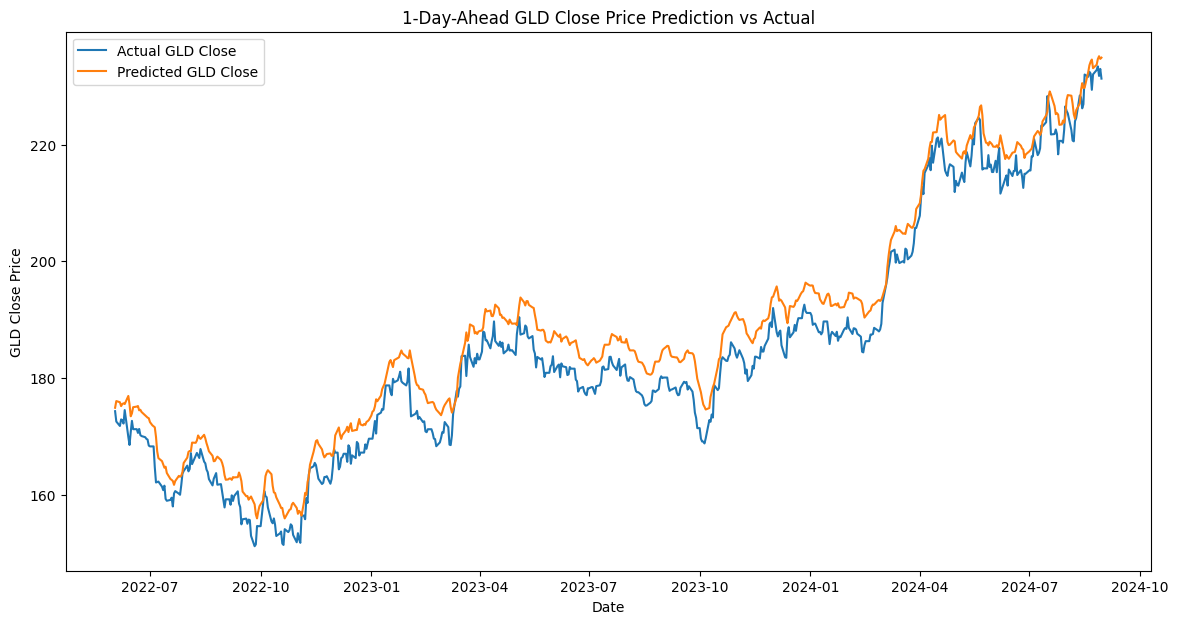

1-Day Ahead Forecast:
Mean Squared Error (MSE): 21.71385433357523
Root Mean Squared Error (RMSE): 4.659812692971171
R^2 Score: 0.9459844637016583




/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


610
612


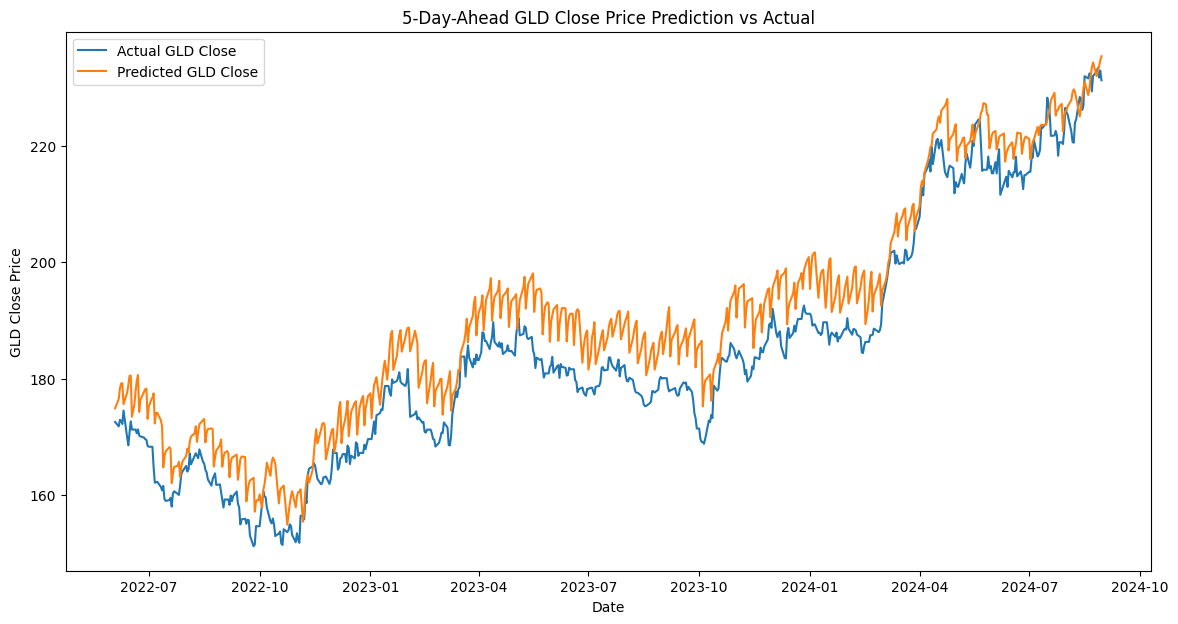

5-Day Ahead Forecast:
Mean Squared Error (MSE): 57.08256522773269
Root Mean Squared Error (RMSE): 7.55530047236592
R^2 Score: 0.8581767066886727




/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


600
612


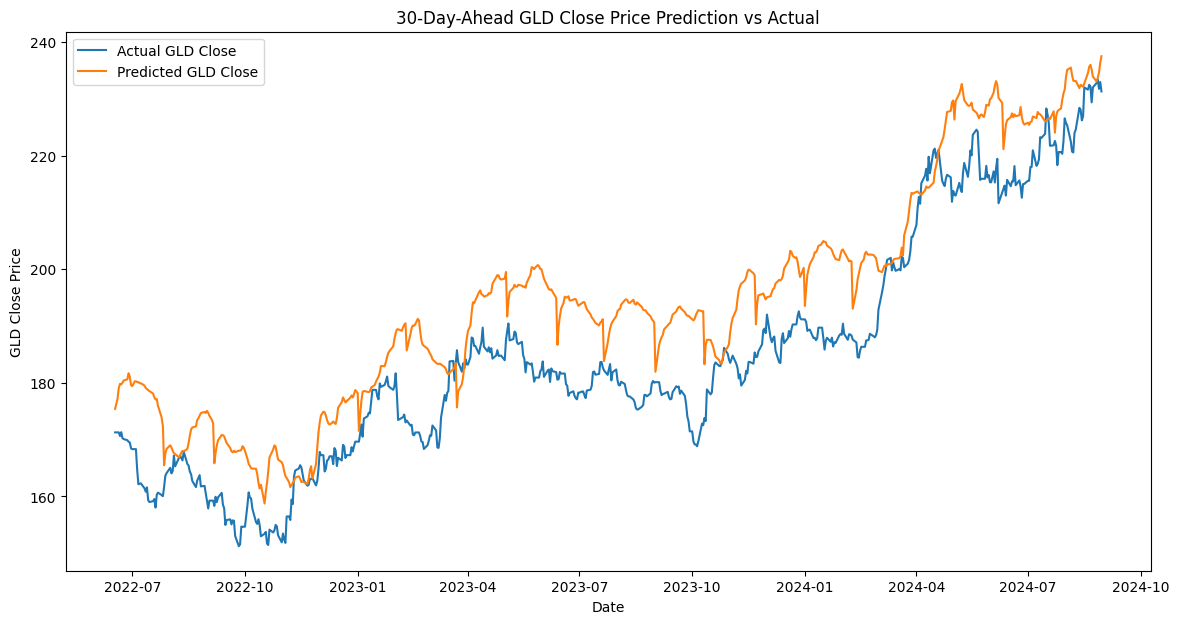

30-Day Ahead Forecast:
Mean Squared Error (MSE): 131.11400312664497
Root Mean Squared Error (RMSE): 11.450502308922738
R^2 Score: 0.6775014044290595




In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
import os

# Suppress TensorFlow logging
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Define forecast ranges
predictions_ranges = [1, 5, 30]

# Loop through each forecast range
for forecast_horizon in predictions_ranges:
    # Load data
    data = pd.read_csv('all_data.csv')
    data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
    data = data.sort_values(by='Date').dropna().reset_index(drop=True)

    # Create lagged gold price columns
    data['gold_price_yesterday'] = data['gold_Close'].shift(1)
    data['gold_price_2days'] = data['gold_Close'].shift(2)
    data['gold_price_3days'] = data['gold_Close'].shift(3)

    # Select required columns and drop rows with missing values
    selected_columns = [
        'Date', 'gold_Close', 'silver_Price', 'sp500_Price', 'gold_price_yesterday',
        'gold_price_2days', 'gold_price_3days', 'cpi_CPI', 'ppi_PPI',
        'm1sl_M1SL', 'dollar_rate_Price', 'is_holiday'
    ]
    filtered_data = data[selected_columns].dropna().reset_index(drop=True)

    # Split data into training and test sets
    train_data = filtered_data[filtered_data['Date'] < '2022-06-01']
    test_data = filtered_data[filtered_data['Date'] >= '2022-06-01']

    # Drop 'Date' column for training and scaling
    train_values = train_data.drop(columns=['Date']).values
    test_values = test_data.drop(columns=['Date']).values

    # Scale data
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train_values)
    test_scaled = scaler.transform(test_values)

    # Prepare data for LSTM model
    def create_lstm_data(dataset, look_back=4):
        X, y = [], []
        for i in range(len(dataset) - look_back):
            X.append(dataset[i:(i + look_back), :])
            y.append(dataset[i + look_back, 0])  # Predicting 'gold_Close'
        return np.array(X), np.array(y)

    look_back = 1
    X_train, y_train = create_lstm_data(train_scaled, look_back)

    # Define LSTM model
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    # Train model
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=0)

    # Predict in forecast_horizon increments
    predictions = []
    current_index = 0

    while current_index + forecast_horizon < len(test_scaled):
        # Prepare the current batch
        current_batch = test_scaled[current_index:current_index + look_back].reshape((1, look_back, test_scaled.shape[1]))

        # Predict for the next forecast_horizon days
        forecast = []
        for i in range(forecast_horizon):
            pred = model.predict(current_batch, verbose=0)[0][0]
            forecast.append(pred)

            # Update the current batch by adding the prediction and keeping other features as is
            new_row = np.array([pred] + test_scaled[current_index + i + 1, 1:].tolist()).reshape(1, 1, test_scaled.shape[1])
            current_batch = np.append(current_batch[:, 1:, :], new_row, axis=1)

        # Save the forecast
        predictions.extend(forecast)

        # Move forward by forecast_horizon days
        current_index += forecast_horizon

    # Convert predictions to the original scale
    predictions = np.array(predictions).reshape(-1, 1)
    predictions = scaler.inverse_transform(np.concatenate([predictions, test_scaled[-len(predictions):, 1:]], axis=1))[:, 0]
    print(len(predictions))
    print(len(test_data))

    # Get actual values for comparison
    actual_gld_close = test_data['gold_Close'].values[-len(predictions):]

    # Plot results
    plt.figure(figsize=(14, 7))
    plt.plot(test_data['Date'][-len(predictions):], actual_gld_close, label='Actual GLD Close')
    plt.plot(test_data['Date'][-len(predictions):], predictions, label='Predicted GLD Close')
    plt.xlabel('Date')
    plt.ylabel('GLD Close Price')
    plt.title(f'{forecast_horizon}-Day-Ahead GLD Close Price Prediction vs Actual')
    plt.legend()
    plt.show()

    # Results
    # Calculate MSE
    mse = mean_squared_error(actual_gld_close, predictions)
    # Calculate RMSE
    rmse = np.sqrt(mse)
    # Calculate R^2 score
    r2 = r2_score(actual_gld_close, predictions)
    # Print results
    print(f"{forecast_horizon}-Day Ahead Forecast:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R^2 Score: {r2}")
    print("\n" + "="*50 + "\n")
